# 🔬 Image Reconstruction Demo
This notebook demonstrates the FFT × Fractal × Phase pipeline.

In [ ]:
!pip install numpy>=1.24 opencv-python scipy scikit-image matplotlib nbformat

PSNR: 5.29 dB | SSIM: 0.0030


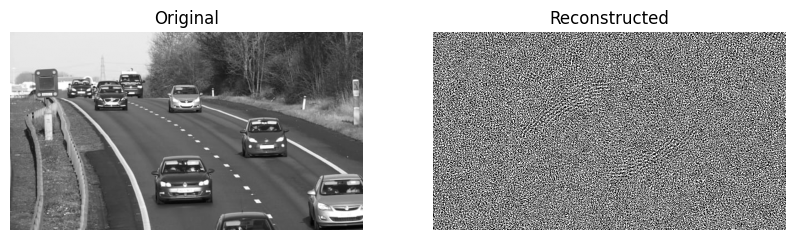

In [19]:
import cv2, matplotlib.pyplot as plt
from src.pipeline import reconstruct_image
import numpy as np, os

# Load your own image or use a sample
path = os.path.join('..', 'examples', 'autos_4.jpg')
if not os.path.exists(path):
    # synthesize a simple sample
    import urllib.request, tempfile
    url = 'https://upload.wikimedia.org/wikipedia/commons/6/6a/Canis_lupus_265b.jpg'
    urllib.request.urlretrieve(url, path)
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f'No se pudo cargar la imagen desde {path}')
img = img.astype(np.float32)/255

rec, psnr, ssim = reconstruct_image(img, k_c=0.15, D_f=1.8)
print(f'PSNR: {psnr:.2f} dB | SSIM: {ssim:.4f}')

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rec, cmap='gray'); plt.title('Reconstructed'); plt.axis('off')
plt.show()